<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Extra notebook for data exploration, prediction and other insights**

Andre Moreira


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


## Import Libraries and Define Auxiliary Functions


We will import the following libraries for the lab


In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

import sklearn.metrics as metrics

In [2]:
# Setting this option will print all collumns of a dataframe
pd.set_option('display.max_columns', None)
# Setting this option will print all of the data in a feature
pd.set_option('display.max_colwidth', None)

This function is to plot the confusion matrix.


In [3]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, cmap ='Greens', annot=True, linewidths = 0.5, 
                linecolor='black',ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [4]:
# Decided to use a different download method

import wget
csv_file_1 = wget.download('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv')
data = pd.read_csv(csv_file_1)

100% [..........................................................] 12100 / 12100

In [6]:
csv_file_2 = wget.download('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')
X = pd.read_csv(csv_file_2)

100% [..........................................................] 31470 / 31470

### I/O: Save for faster re-start other times

In [4]:
data_file_name = 'dataset_part_2.csv'
X_file_name = 'dataset_part_3.csv'

In [ ]:
# write
# df.to_csv(name)

In [8]:
#read
data = pd.read_csv(data_file_name) # need to let the system know that the first (0) column is the index

In [96]:
X_raw = pd.read_csv(X_file_name)

In [ ]:
X = X_raw.copy()

In [9]:
data.shape

(90, 18)

In [10]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [20]:
# In order to use some other code, we store the 'data' DF also as 'df' 
df = data.copy()

In [11]:
X.shape

(90, 83)

In [13]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_CCAFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,Serial_B0003,Serial_B0005,Serial_B0007,Serial_B1003,Serial_B1004,Serial_B1005,Serial_B1006,Serial_B1007,Serial_B1008,Serial_B1010,Serial_B1011,Serial_B1012,Serial_B1013,Serial_B1015,Serial_B1016,Serial_B1017,Serial_B1018,Serial_B1019,Serial_B1020,Serial_B1021,Serial_B1022,Serial_B1023,Serial_B1025,Serial_B1026,Serial_B1028,Serial_B1029,Serial_B1030,Serial_B1031,Serial_B1032,Serial_B1034,Serial_B1035,Serial_B1036,Serial_B1037,Serial_B1038,Serial_B1039,Serial_B1040,Serial_B1041,Serial_B1042,Serial_B1043,Serial_B1044,Serial_B1045,Serial_B1046,Serial_B1047,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.

Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [14]:
Y = data['Class'].to_numpy(copy=True)

In [15]:
type(Y)

numpy.ndarray

Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [16]:
X = X.astype(float) # make sure all numbers are float
X.head()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_CCAFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,Serial_B0003,Serial_B0005,Serial_B0007,Serial_B1003,Serial_B1004,Serial_B1005,Serial_B1006,Serial_B1007,Serial_B1008,Serial_B1010,Serial_B1011,Serial_B1012,Serial_B1013,Serial_B1015,Serial_B1016,Serial_B1017,Serial_B1018,Serial_B1019,Serial_B1020,Serial_B1021,Serial_B1022,Serial_B1023,Serial_B1025,Serial_B1026,Serial_B1028,Serial_B1029,Serial_B1030,Serial_B1031,Serial_B1032,Serial_B1034,Serial_B1035,Serial_B1036,Serial_B1037,Serial_B1038,Serial_B1039,Serial_B1040,Serial_B1041,Serial_B1042,Serial_B1043,Serial_B1044,Serial_B1045,Serial_B1046,Serial_B1047,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [17]:
X_new = preprocessing.StandardScaler().fit(X).transform(X) # keep it in another variable to check it works before assigning it to X
X_new[0:2]

array([[-1.71291154e+00, -1.94814463e-16, -6.53912840e-01,
        -1.57589457e+00, -9.73440458e-01, -1.05999788e-01,
        -1.05999788e-01, -6.54653671e-01, -1.05999788e-01,
        -5.51677284e-01,  3.44342023e+00, -1.85695338e-01,
        -3.33333333e-01, -1.05999788e-01, -2.42535625e-01,
        -4.29197538e-01,  7.97724035e-01, -5.68796459e-01,
        -4.10890702e-01, -4.10890702e-01, -1.50755672e-01,
        -7.97724035e-01, -1.50755672e-01, -3.92232270e-01,
         9.43398113e+00, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.50755672e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.50755672e-01, -1.05999788e-0

In [18]:
X = X_new.copy()
type(X)

numpy.ndarray

## Exploratory data analysis part

In [22]:
df.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class'],
      dtype='object')

In [26]:
df['Reused'].value_counts()

Reused
False    53
True     37
Name: count, dtype: int64

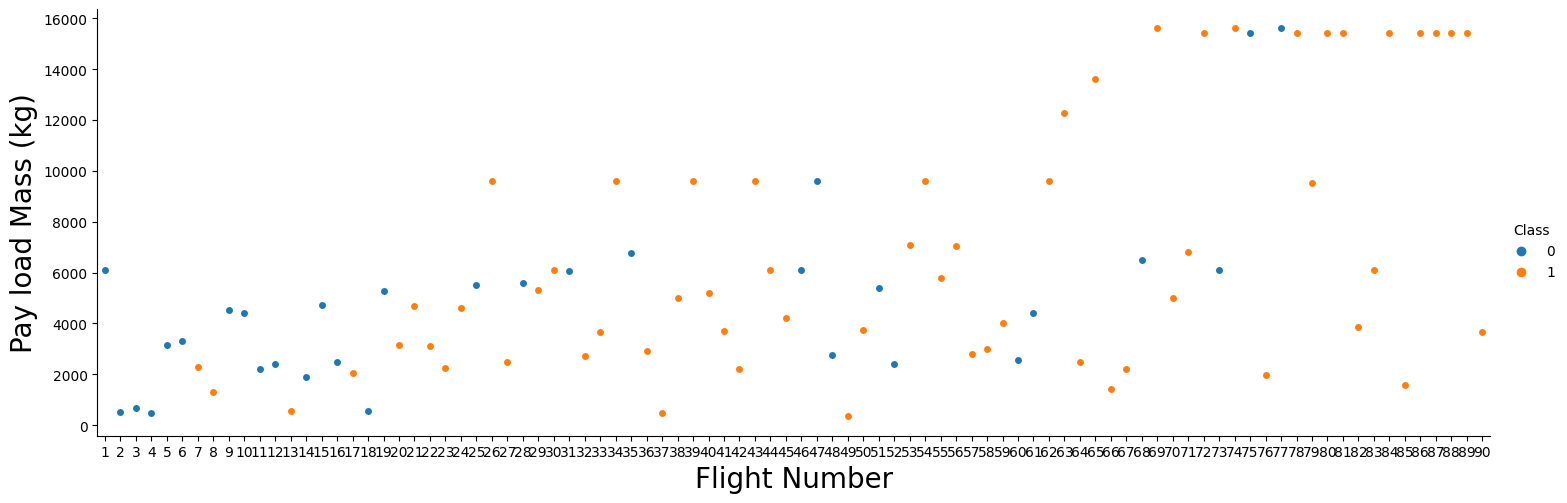

In [21]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 3)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

## Machine Learning part

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (72, 83) (72,)
Test set: (18, 83) (18,)


NOTE: in this notebook, we will only use/explore the data using the Decision Tree model, as it turned out to be the best one. 

Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [69]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree_md = DecisionTreeClassifier()

In [70]:
tree_cv = GridSearchCV(tree_md, parameters, cv = 10)
tree_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [71]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 14, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}
accuracy : 0.875


tree_cv_best = DecisionTreeClassifier(criterion = 'gini', max_depth = 14,
                                     max_features = 'sqrt', min_samples_leaf = 1,
                                     min_samples_split = 10, splitter = 'best')
tree_cv_best.fit(X_train, Y_train)

In [80]:
tree_cv_best = DecisionTreeClassifier(criterion = 'gini', max_depth = 14)
tree_cv_best.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=14)

In [81]:
tree_cv_best.score(X_test, Y_test)

0.8888888888888888

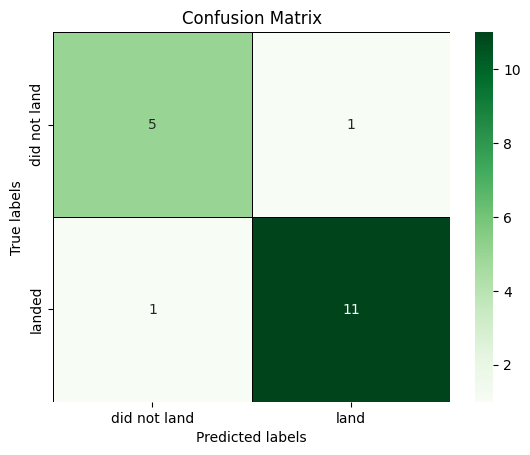

In [82]:
yhat = tree_cv_best.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [83]:
tree_cv_scr = tree_cv.score(X_test, Y_test)
tree_cv_scr

0.8888888888888888

We can plot the confusion matrix


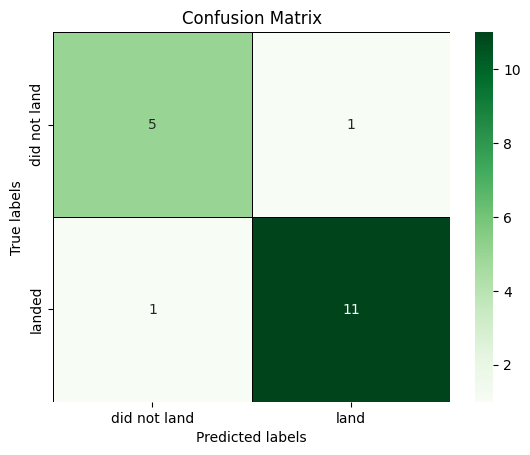

In [84]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [85]:
#F1
tree_cv_F1 = metrics.f1_score(Y_test, yhat)
tree_cv_F1

0.9166666666666666

In [ ]:
from sklearn import tree

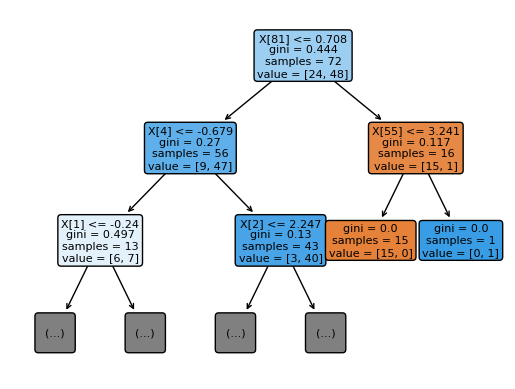

In [110]:
tree.plot_tree(tree_cv_best, filled = True, proportion = False, rounded = True,
              label = 'all', fontsize = 8, max_depth = 2)
plt.show()

In [131]:
# Factors that play a key role in the decision tree at the top level:
print(X_raw.columns[81])
print('')
print(X_raw.columns[4])
print(X_raw.columns[55])
print('')
print(X_raw.columns[1])
print(X_raw.columns[2])

Legs_False

ReusedCount
Serial_B1036

PayloadMass
Flights


In [105]:
X_raw.head(2)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_CCAFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,Serial_B0003,Serial_B0005,Serial_B0007,Serial_B1003,Serial_B1004,Serial_B1005,Serial_B1006,Serial_B1007,Serial_B1008,Serial_B1010,Serial_B1011,Serial_B1012,Serial_B1013,Serial_B1015,Serial_B1016,Serial_B1017,Serial_B1018,Serial_B1019,Serial_B1020,Serial_B1021,Serial_B1022,Serial_B1023,Serial_B1025,Serial_B1026,Serial_B1028,Serial_B1029,Serial_B1030,Serial_B1031,Serial_B1032,Serial_B1034,Serial_B1035,Serial_B1036,Serial_B1037,Serial_B1038,Serial_B1039,Serial_B1040,Serial_B1041,Serial_B1042,Serial_B1043,Serial_B1044,Serial_B1045,Serial_B1046,Serial_B1047,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


### Legs

In [114]:
X_raw.iloc[:,81].value_counts()

Legs_False
0.0    71
1.0    19
Name: count, dtype: int64

In [118]:
# double check
X_raw.iloc[:,82].value_counts()

Legs_True
1.0    71
0.0    19
Name: count, dtype: int64

### Re-use

In [115]:
X_raw.iloc[:,4].value_counts()

ReusedCount
0.0    30
1.0    24
3.0    12
5.0    11
2.0     9
4.0     4
Name: count, dtype: int64

In [121]:
X_raw.iloc[:,80].value_counts()

Reused_True
0.0    53
1.0    37
Name: count, dtype: int64

In [122]:
X_raw.iloc[:,79].value_counts()

Reused_False
1.0    53
0.0    37
Name: count, dtype: int64

#### Let's drill down in this data

In [134]:
data.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class'],
      dtype='object')

Note that 'Reused' in this context means that the booster was used before

In [401]:
aux = data[['Legs','Reused','Outcome','Class','FlightNumber']].copy()
aux.head()

,Legs,Reused,Outcome,Class,FlightNumber
0,False,False,None None,0,1
1,False,False,None None,0,2
2,False,False,None None,0,3
3,False,False,False Ocean,0,4
4,False,False,None None,0,5


In [203]:
# How successful is a launch that uses a new booster?

a_n = aux[(aux['Reused']==False)]['Class'].count() # Number of launches using a new booster
b_n = aux[(aux['Reused']==False)]['Class'].sum() # number of **successful** launches with new booster
print(a_n, b_n)
print('% Success of launches with a new booster = ', b_n/a_n)

53 31
% Success of launches with a new booster =  0.5849056603773585


In [204]:
a_r = aux[(aux['Reused']==True)]['Class'].count() # number of launches with a re-used booster
b_r = aux[(aux['Reused']==True)]['Class'].sum() # number of **successful** launches with re-used booster
print(a_r, b_r)
print('% Success of launches with re-used booster = ', b_r/a_r)

37 29
% Success of launches with re-used booster =  0.7837837837837838


This may come as a surprise, but is probably related to SpaceX's 'learning curve'. Lets examine this over time.

In [ ]:
# We create two cumulative indexes: Sucess_new and Success_reused
# SN (Success_new) = at a given time, the cumulative proportion of successful launches with new boosters
# SR (Success_reused) = at a given time, the cumulative proportion of successful launches with re-used boosters

In [367]:
aux.index

RangeIndex(start=0, stop=90, step=1)

In [390]:
# Let's do some old-school programming - probably can do this with 2 lines of Pandas, but I am in a hurry :-)
cum_TN = 0 # total number of flights with a new booster
cum_TR = 0 # total nr. of flights with re-used booster
cum_SN = 0 # total number of successful flights with a new booster
cum_SR = 0 # total number of successful flights with a re-used booster
cum_TS = 0 # overall success ratio (since we are doing this anyway, no extra work really...)
rt_NR = [] # proportion of launches using a re-used booster
SR_l = [] # lists that I will later add to the dataframe for graphic use
SN_l = []
TS_l = [] # total success ratio
ix = 1
for i in aux.index:
    if aux.iloc[i,1] == False: # new boosters
        
        cum_TN = cum_TN + 1 # add to the total number of launches using a new booster
        if aux.iloc[i,3] == 1:
            cum_SN = cum_SN + 1 # if the launch was successful, add to the cum_SN variable, otherwise leave it
            cum_TS = cum_TS + 1 # add to the overall success index
    else:
        
        cum_TR = cum_TR + 1 # add to the total number of launches using a re-used booster
        if aux.iloc[i,3] == 1:
            cum_SR = cum_SR + 1 # if the launch was successful, add to the cum_SR variable
            cum_TS = cum_TS + 1 # add to the overall success index

    if cum_TR == 0: # until booster are re-used for the first time, cum_TR remains 0 and so the success index 
        dummy = 0
    else:
        dummy = cum_SR/cum_TR;
    
    TS_l.append(cum_TS / ix) # overall success rate
    rt_NR.append(cum_TR / ix) # overall proportion of launches using a re-used boost
    SN_l.append(cum_SN / cum_TN) # this is cumulative success index of new booster, as a 'time' series
    SR_l.append(dummy) # this is cumulative success index of reused booster, as a 'time' series
    ix = ix + 1 # really old school programming, he!
    
print(cum_TN + cum_TR)

90


In [391]:
cum_TS

60

In [392]:
cum_TR

37

In [393]:
cum_TN

53

In [394]:
len(rt_NR)

90

In [402]:
# Cast those two lists into the aux DF
aux['Success rate (new booster)'] = SN_l
aux['Success rate (re-used booster)'] = SR_l
aux['Proportion of re-used boosters'] = rt_NR
aux['Overall success rate'] = TS_l

In [403]:
aux.head(2)

,Legs,Reused,Outcome,Class,FlightNumber,Success rate (new booster),Success rate (re-used booster),Proportion of re-used boosters,Overall success rate
0,False,False,None None,0,1,0.0,0.0,0.0,0.0
1,False,False,None None,0,2,0.0,0.0,0.0,0.0


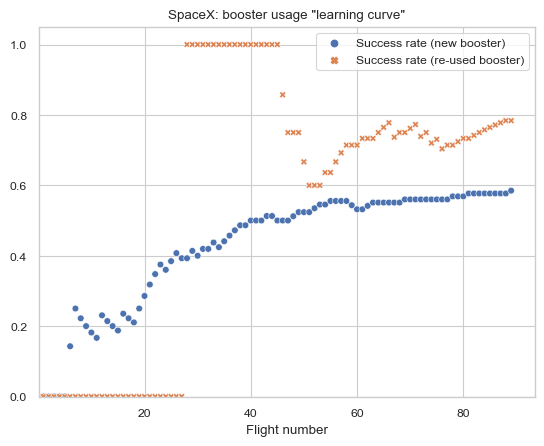

In [405]:
sns.set_theme() # reset style
sns.set_context("paper") # options: paper, notebook, talk, poster
sns.set_style("whitegrid")

g1 = sns.scatterplot(data=aux[['Success rate (new booster)',
                               'Success rate (re-used booster)']])

g1.set(ylim=(0, 1.05))
g1.set(xlim=(0.100))

plt.title('SpaceX: booster usage "learning curve"')
# Set x-axis label
plt.xlabel('Flight number')
# Set y-axis label
plt.ylabel('')
plt.show()

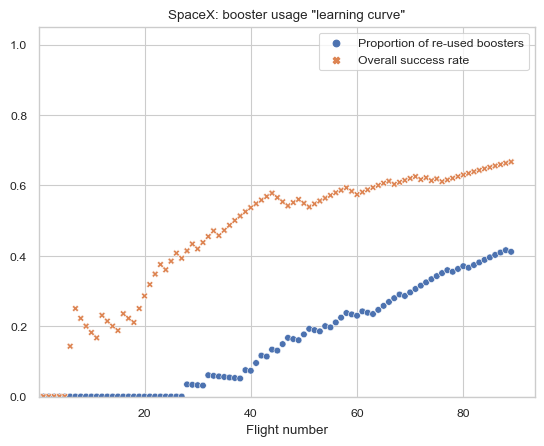

In [406]:
sns.set_theme() # reset style
sns.set_context("paper") # options: paper, notebook, talk, poster
sns.set_style("whitegrid")

g1 = sns.scatterplot(data=aux[['Proportion of re-used boosters',
                               'Overall success rate']])

g1.set(ylim=(0, 1.05))
g1.set(xlim=(0.100))

plt.title('SpaceX: booster usage "learning curve"')
# Set x-axis label
plt.xlabel('Flight number')
# Set y-axis label
plt.ylabel('')
plt.show()

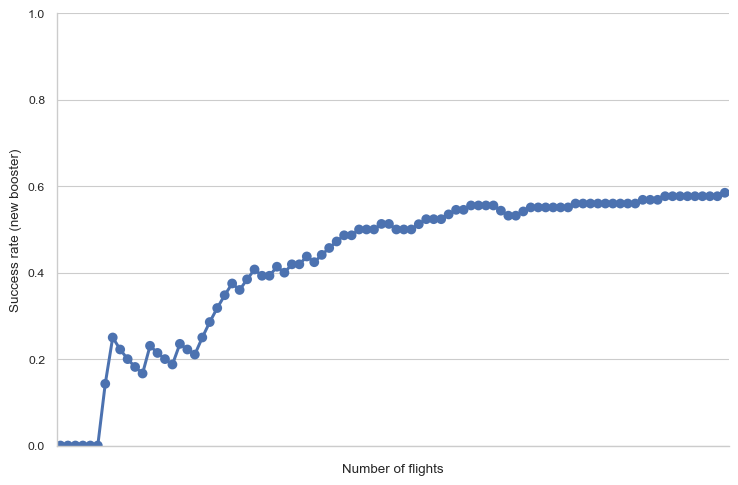

In [333]:
sns.set_theme() # reset style
sns.set_context("paper") # options: paper, notebook, talk, poster
sns.set_style("whitegrid")

g1 = sns.catplot(y="SN", x="FN", data=aux, aspect = 1.5, kind="point")

g1.set(xticklabels=[]) # take the lables out, no need for the numbers
g1.set_axis_labels("Number of flights", "Success rate (new booster)")
g1.set(ylim=(0, 1))

plt.show()

### How do 'Legs' and 'Reused' relate?

In [186]:
a = aux[((aux['Legs']==False) & (aux['Reused']==True))].count()
b = aux[((aux['Legs']==True) & (aux['Reused']==False))].count()
c= aux[((aux['Legs']==True) & (aux['Reused']==True))].count()
d = aux[((aux['Legs']==False) & (aux['Reused']==False))].count()

In [191]:
print('Cases where booster had NO legs but was re-used',a[0])
print('Cases where booster had legs but was NOT re-used',b[0])
print('Cases where booster had legs and was re-used',c[0])
print('Cases where booster had NO legs and was NOT re-used',d[0])

Cases where booster had NO legs but was re-used 5
Cases where booster had legs but was NOT re-used 39
Cases where booster had legs and was re-used 32
Cases where booster had NO legs and was NOT re-used 14


In [192]:
# check if we have 90 cases
a[0]+b[0]+c[0]+d[0]

90

### Others

In [117]:
X_raw.iloc[:,2].value_counts()

Flights
1.0    53
2.0    19
3.0     8
4.0     6
5.0     2
6.0     2
Name: count, dtype: int64

In [124]:
X_raw.iloc[:,1].value_counts()

PayloadMass
15400.000000    10
9600.000000      7
6104.959412      5
15600.000000     3
4230.000000      1
                ..
6070.000000      1
2708.000000      1
3669.000000      1
6761.000000      1
3681.000000      1
Name: count, Length: 69, dtype: int64

In [116]:
X_raw.iloc[:,55].value_counts()

Serial_B1036
0.0    88
1.0     2
Name: count, dtype: int64